In [1]:
import sys, platform, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
# import seaborn as sns

# Global definition of matplotlib plots appearance

plt.rcParams['mathtext.default']= 'regular'
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['axes.labelsize'] = 15
plt.rcParams["axes.labelpad"]=10             # axes labels distance from tick labels
plt.rcParams["axes.titlesize"] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.dpi'] = 150             #  figure dimension in dpi

In [2]:
camb_installation_path = './' 
camb_path = os.path.realpath(os.path.join(os.getcwd(),camb_installation_path))
sys.path.insert(0,camb_path)

import camb
from camb import model, initialpower

In [18]:
cl_cls = np.loadtxt('/data2/code/hi_classy_dev/output/boxphi_cl_lensed.dat')
bknms_cls = None
bk_cls = None
with open('/data2/code/hi_classy_dev/output/boxphi_background.dat', 'r') as f_in:
  dat = f_in.readlines()
  bknms_cls = dat[3].replace('#', '').split()
  i = 0
  while i < len(bknms_cls):
    if ':' not in bknms_cls[i]:
      bknms_cls.pop(i)
    else:
      bknms_cls[i] = bknms_cls[i].split(sep=':')[-1]
      i += 1 
  print(bknms_cls)
bk_cls = np.loadtxt('/data2/code/hi_classy_dev/output/boxphi_background.dat')


['z', 'proper', 'conf.', 'H', 'comov.', 'ang.diam.dist.', 'lum.', 'comov.snd.hrz.', '(.)rho_g', '(.)rho_b', '(.)rho_cdm', '(.)rho_ncdm[0]', '(.)p_ncdm[0]', '(.)rho_lambda', '(.)rho_ur', '(.)rho_crit', 'gr.fac.', 'gr.fac.', '(.)rho_smg', '(.)p_smg', 'phi_smg', 'dphi_smg', 'ddphi_smg', 'dddphi_smg', 'H_prime', 'H_prime_prime', 'M*^2_smg', 'D_M*^2_smg', 'kineticity_smg', 'braiding_smg', 'tensor_excess_smg', 'Mpl_running_smg', 'c_s^2', 'kin', 'E0', 'E1', 'E2', 'E3', 'kineticity_prime_smg', 'braiding_prime_smg', 'lambda_1', 'lambda_2', 'lambda_3', 'lambda_4', 'lambda_5', 'lambda_6', 'lambda_7', 'lambda_8', 'lambda_9', 'lambda_10', 'lambda_11', 'lambda_2_p', 'lambda_8_p', 'lambda_9_p', 'lambda_11_p', 'cs2num', 'cs2num_p', 'tau_smg', 'spi1', 'spi2', 'spi3', 'spih', 'spie', 'spim', 's00', 's00k', 's00p', 's0i', 's0ip', 'sii', 'siik', 'siip', 'siipp', 'sij']


In [4]:
bknms_cam = None
bk_cam = None
with open('/data2/code/eftcamb_osc/fortran/eftcamb_test/results/spectra_results/5_hdsk_boxphi_background_hdsk.dat', 'r') as f_in:
  dat = f_in.readlines()
  bknms_cam = dat[0].replace('#', '').split()
  print(bknms_cam)
bk_cam = np.loadtxt('/data2/code/eftcamb_osc/fortran/eftcamb_test/results/spectra_results/5_hdsk_boxphi_background_hdsk.dat')
bk_cam[-1,0] = 0


['z', 'tau', 'H', 'Hdot', 'rhom', 'presm', 'rhomdot', 'presmdot', 'phi', 'phidot', 'phidotdot', 'alphaK', 'alphaB', 'spi1', 'spi2', 'spi3', 'spih', 'spie', 'spim', 's00', 's00k', 's00p', 's0i', 's0ip', 'sii', 'siik', 'siip', 'siipp', 'sij']


/data2/VSCode-linux-x64/data/tmp/ipykernel_458393/3519762262.py:14: RuntimeWarning: divide by zero encountered in log10
  ax[0,1].plot(np.log10(z), bk_cls[:, bknms_cls.index('H_prime')]/bk_cam[:, bknms_cam.index('Hdot')], label='camb')
/data2/VSCode-linux-x64/data/tmp/ipykernel_458393/3519762262.py:19: RuntimeWarning: divide by zero encountered in log10
  ax[1,0].plot(np.log10(z), bk_cam[:, bknms_cam.index('phi')], label='camb')
/data2/VSCode-linux-x64/data/tmp/ipykernel_458393/3519762262.py:20: RuntimeWarning: divide by zero encountered in log10
  ax[1,0].plot(np.log10(z), bk_cls[:, bknms_cls.index('phi_smg')], label='class', ls='--')
/data2/VSCode-linux-x64/data/tmp/ipykernel_458393/3519762262.py:25: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(np.log10(z), bk_cam[:, bknms_cam.index('phidot')], label='camb')
/data2/VSCode-linux-x64/data/tmp/ipykernel_458393/3519762262.py:26: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(np.log10(z), bk_cls[:

Text(0.5, 1.0, '$s_2$')

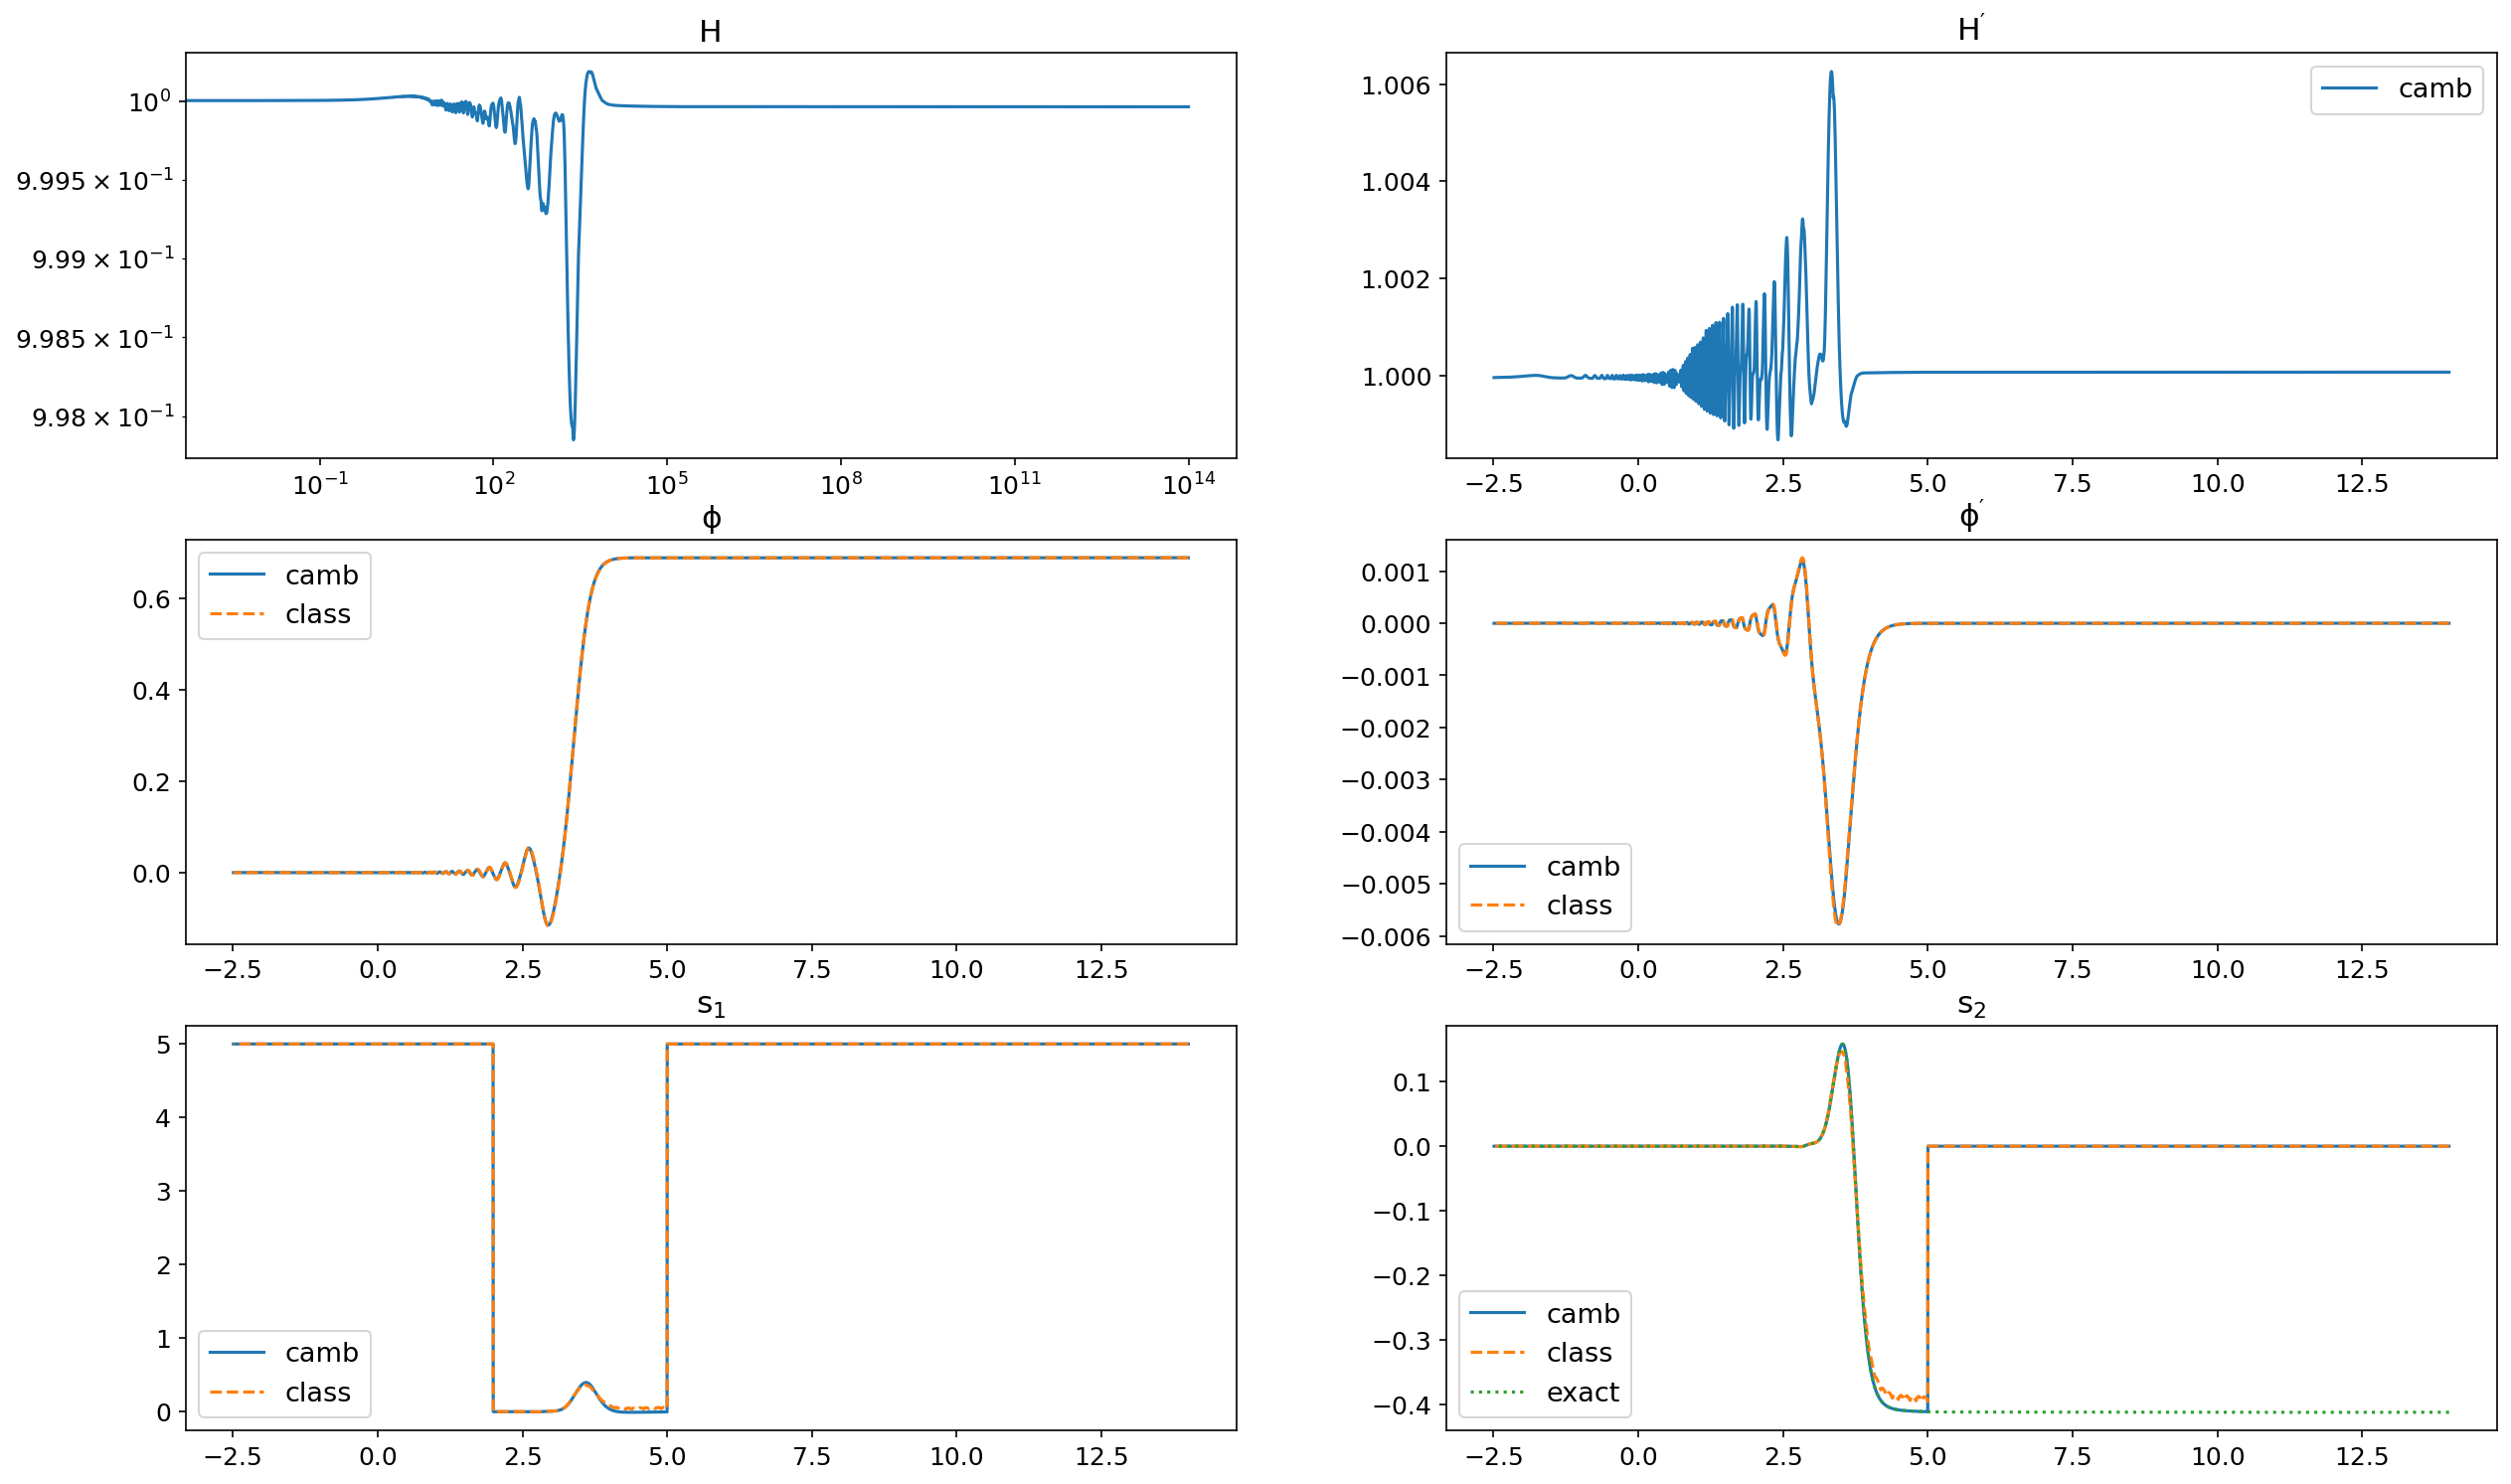

In [5]:
fig, ax = plt.subplots(3,2, figsize = (20,12))
z = bk_cam[:,bknms_cam.index('z')]
tau = bk_cam[:, bknms_cam.index('tau')]

ax[0,0].loglog(z, bk_cam[:,bknms_cam.index('H')]/bk_cls[:,bknms_cls.index('H')])
ax[0,0].set_title('H')

# ax[0,1].loglog(z, bk_cam[:,bknms_cam.index('Hdot')]/bk_cls[:,bknms_cls.index('H_prime')])

# ax[0,0].plot(np.log10(z), np.log(bk_cam[:, bknms_cam.index('tau')]), label='camb')
# ax[0,0].plot(np.log10(z), np.log(bk_cls[:, bknms_cls.index('conf.')]), label='class', ls='--')
# ax[0,0].legend()

ax[0,1].plot(np.log10(z), bk_cls[:, bknms_cls.index('H_prime')]/bk_cam[:, bknms_cam.index('Hdot')], label='camb')
# ax[0,1].plot(np.log10(z), bk_cls[:, bknms_cls.index('H')], label='class', ls='--')
ax[0,1].legend()
ax[0,1].set_title(r'$H^\prime$')

ax[1,0].plot(np.log10(z), bk_cam[:, bknms_cam.index('phi')], label='camb')
ax[1,0].plot(np.log10(z), bk_cls[:, bknms_cls.index('phi_smg')], label='class', ls='--')
# ax[1,0].set_ylim([0.5,1.5])
ax[1,0].legend()
ax[1,0].set_title(r'$\phi$')

ax[1,1].plot(np.log10(z), bk_cam[:, bknms_cam.index('phidot')], label='camb')
ax[1,1].plot(np.log10(z), bk_cls[:, bknms_cls.index('dphi_smg')], label='class', ls='--')
# ax[1,1].set_ylim([0.5,1.5])
ax[1,1].legend()
ax[1,1].set_title(r'$\phi^\prime$')

ax[2,0].plot(np.log10(z), bk_cam[:, bknms_cam.index('spi1')], label='camb')
ax[2,0].plot(np.log10(z), bk_cls[:, bknms_cls.index('spi1')], label='class', ls='--')
ax[2,0].legend()
ax[2,0].set_title(r'$s_1$')

hubble = bk_cam[:, bknms_cam.index('H')]
dphi = bk_cam[:, bknms_cam.index('phidot')]
ddphi = bk_cam[:, bknms_cam.index('phidotdot')]
a = 1./(1.+z)
xi = 6.223436525e-05
est = xi*(-8*a**3*hubble*dphi-3*xi*dphi**4+4*a**2*ddphi)/(2*a**4+12*xi*a**3*hubble*dphi+3*xi**2*dphi**4)
ax[2,1].plot(np.log10(z), bk_cam[:, bknms_cam.index('spi2')], label='camb')
ax[2,1].plot(np.log10(z), bk_cls[:, bknms_cls.index('spi2')], label='class', ls='--')
ax[2,1].plot(np.log10(z), est, label="exact", ls='dotted')
ax[2,1].legend()
ax[2,1].set_title(r'$s_2$')
# ax[2,1].set_ylim([0.5,1.5])


In [21]:
stability_flag ={
                'EFT_ghost_math_stability'   : False,
                'EFT_mass_math_stability'    : False,
                'EFT_ghost_stability'        : False,
                'EFT_gradient_stability'     : False,
                'EFT_mass_stability'         : False,
                'EFT_additional_priors'      : False,
                }
xboxphi_params = {
                'EFTflag' :4,
                'FullMappingEFTmodel': 0,
                'Horndeski_model': 3, 
                'Horndeski_parameter_number': 2, 
                'Horndeski_model_specific_ic': True,
                'Horndeski_evolve_hubble': False,
                'EFT_evolve_delta_phi': True,
                'EFT_evolve_metric_h': False,
                'Horndeski_param1': 6.223436525e-05,
                # 'Horndeski_param1': 0,
                'Horndeski_param2': 4.086313048e+03,
                'Honrdeski_phi_ini': 6.893926794e-01,
                'horndeski_background_interpolation_num_points': 10000,
                'horndeski_background_a_ini': 1e-14,
                'a_pertcutoff_before': 1e-5,
                'a_pertcutoff_after': 1e-2,
                'EFTCAMB_turn_on_time': 1.e-10,
                 }
xboxphi_params.update(stability_flag)

pars = camb.read_ini('fortran/eftcamb_test/parameters/hdsk_base_params.ini')
camb.set_params(cp=pars, **xboxphi_params)
results = camb.get_results(pars)
cl_cam = results.get_cmb_power_spectra(pars, CMB_unit='muK')['total']

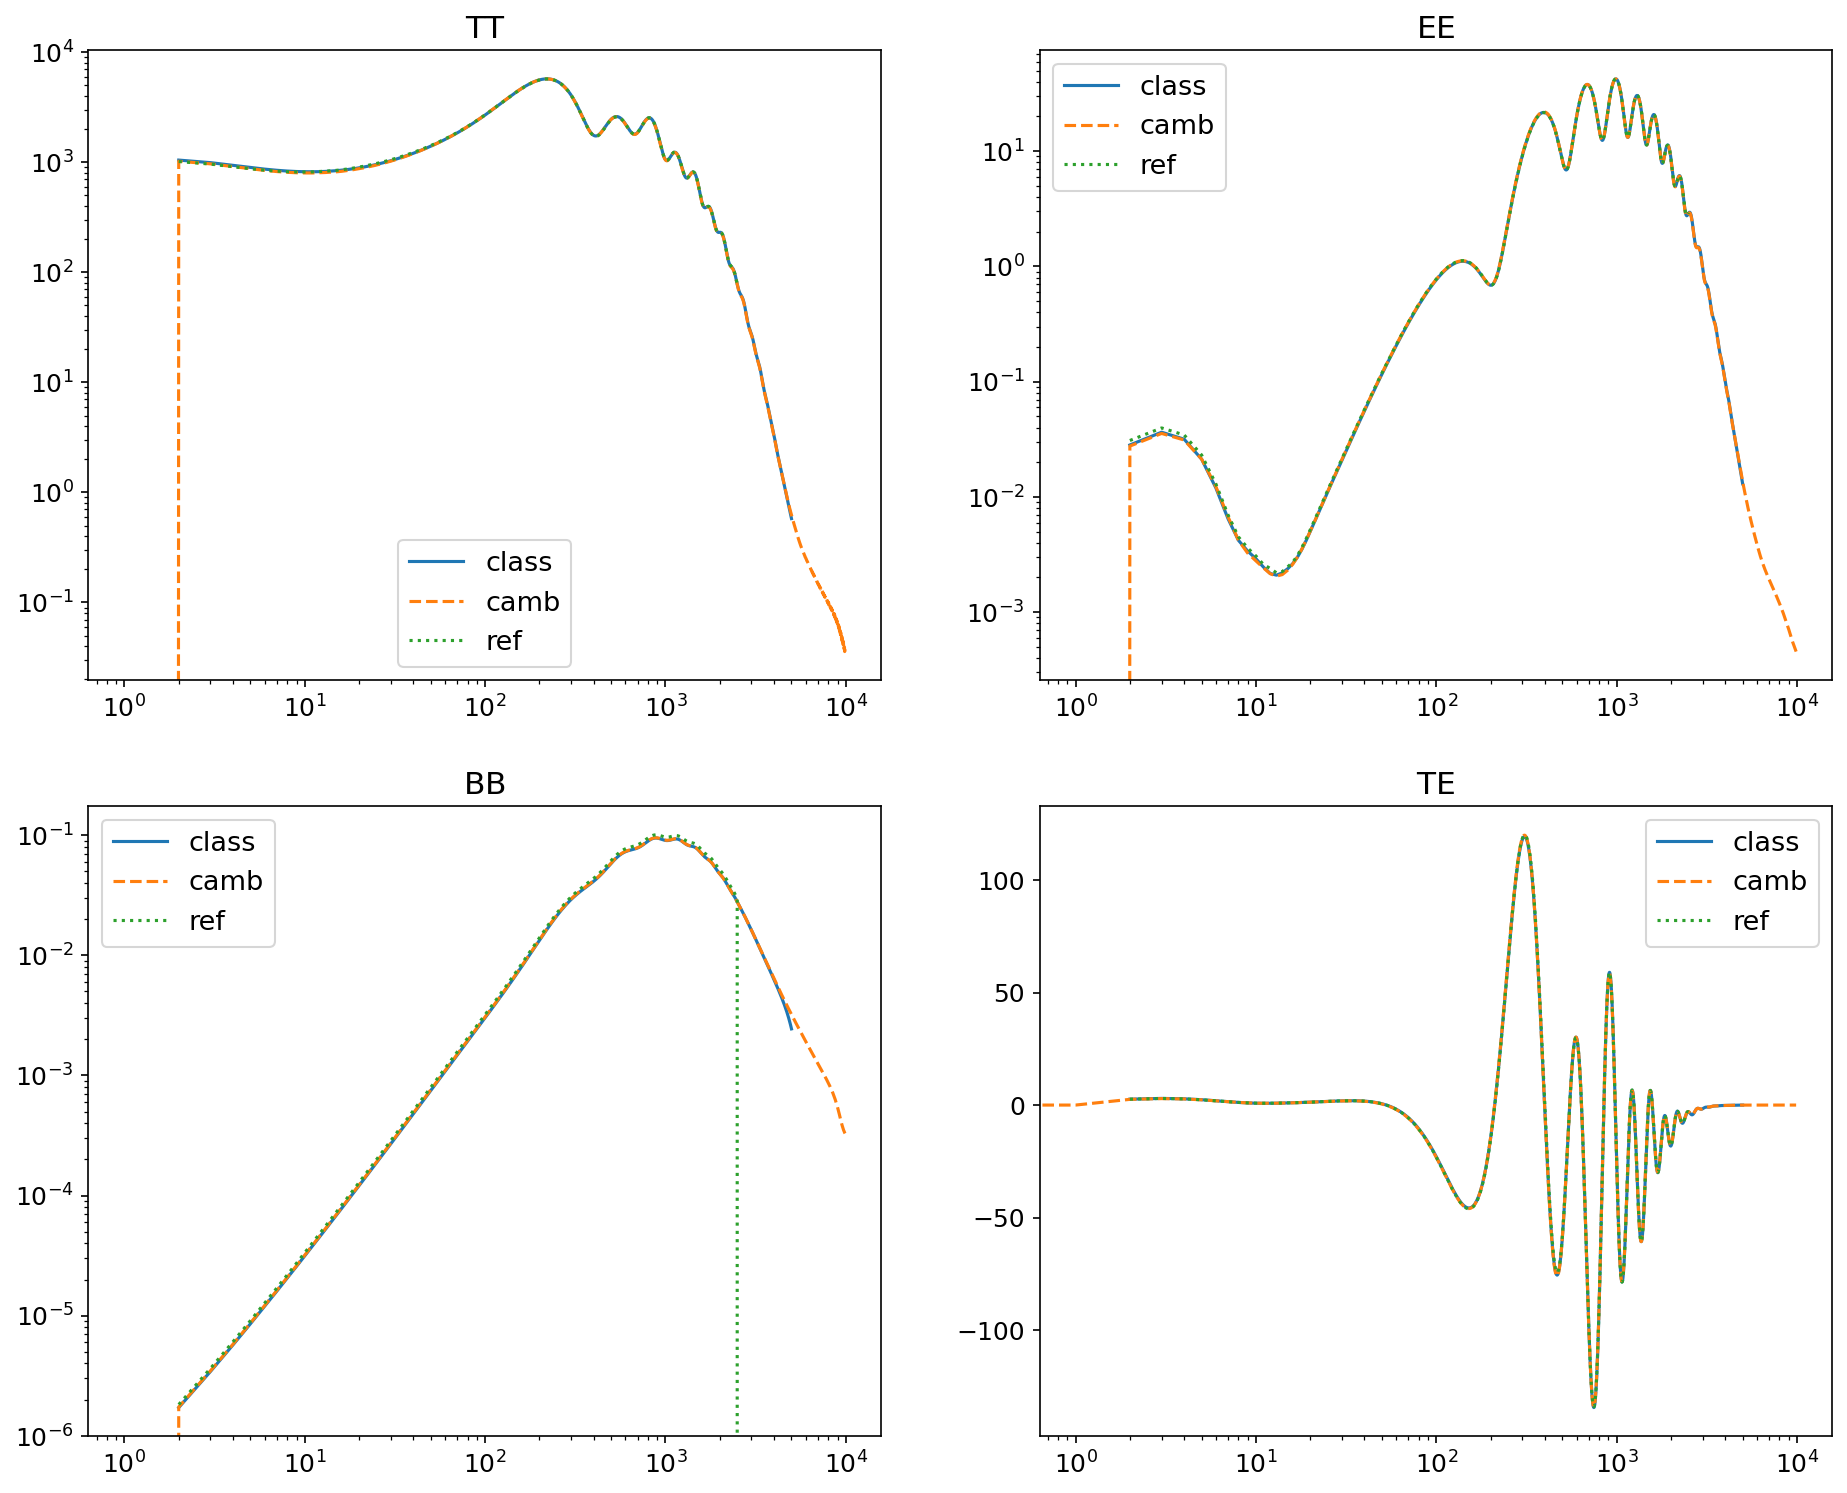

In [27]:
cl_ref = np.loadtxt('/data2/data/planck_2018/COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt')

fig, ax = plt.subplots(2,2, figsize = (15,12))
l_cls = cl_cls[:,0]
l_cam = np.arange(cl_cam.shape[0])
l_ref = cl_ref[:,0]

ax[0,0].loglog(l_cls, cl_cls[:,1], label='class')
ax[0,0].loglog(l_cam, cl_cam[:,0], label='camb', ls='--')
ax[0,0].loglog(l_ref, cl_ref[:,1], label='ref', ls='dotted')
ax[0,0].set_title(r"$TT$")
ax[0,0].legend()

ax[0,1].loglog(l_cls, cl_cls[:,2], label='class')
ax[0,1].loglog(l_cam, cl_cam[:,1], label='camb', ls='--')
ax[0,1].loglog(l_ref, cl_ref[:,3], label='ref', ls='dotted')
ax[0,1].set_title(r"$EE$")
ax[0,1].legend()

ax[1,0].loglog(l_cls, cl_cls[:,3], label='class')
ax[1,0].loglog(l_cam, cl_cam[:,2], label='camb', ls='--')
ax[1,0].loglog(l_ref, cl_ref[:,4], label='ref', ls='dotted')
ax[1,0].set_title(r"$BB$")
ax[1,0].legend()

ax[1,1].plot(l_cls, cl_cls[:,4], label='class')
ax[1,1].plot(l_cam, cl_cam[:,3], label='camb', ls='--')
ax[1,1].plot(l_ref, cl_ref[:,2], label='ref', ls='dotted')
ax[1,1].set_title(r"$TE$")
ax[1,1].set_xscale('log')
ax[1,1].legend()

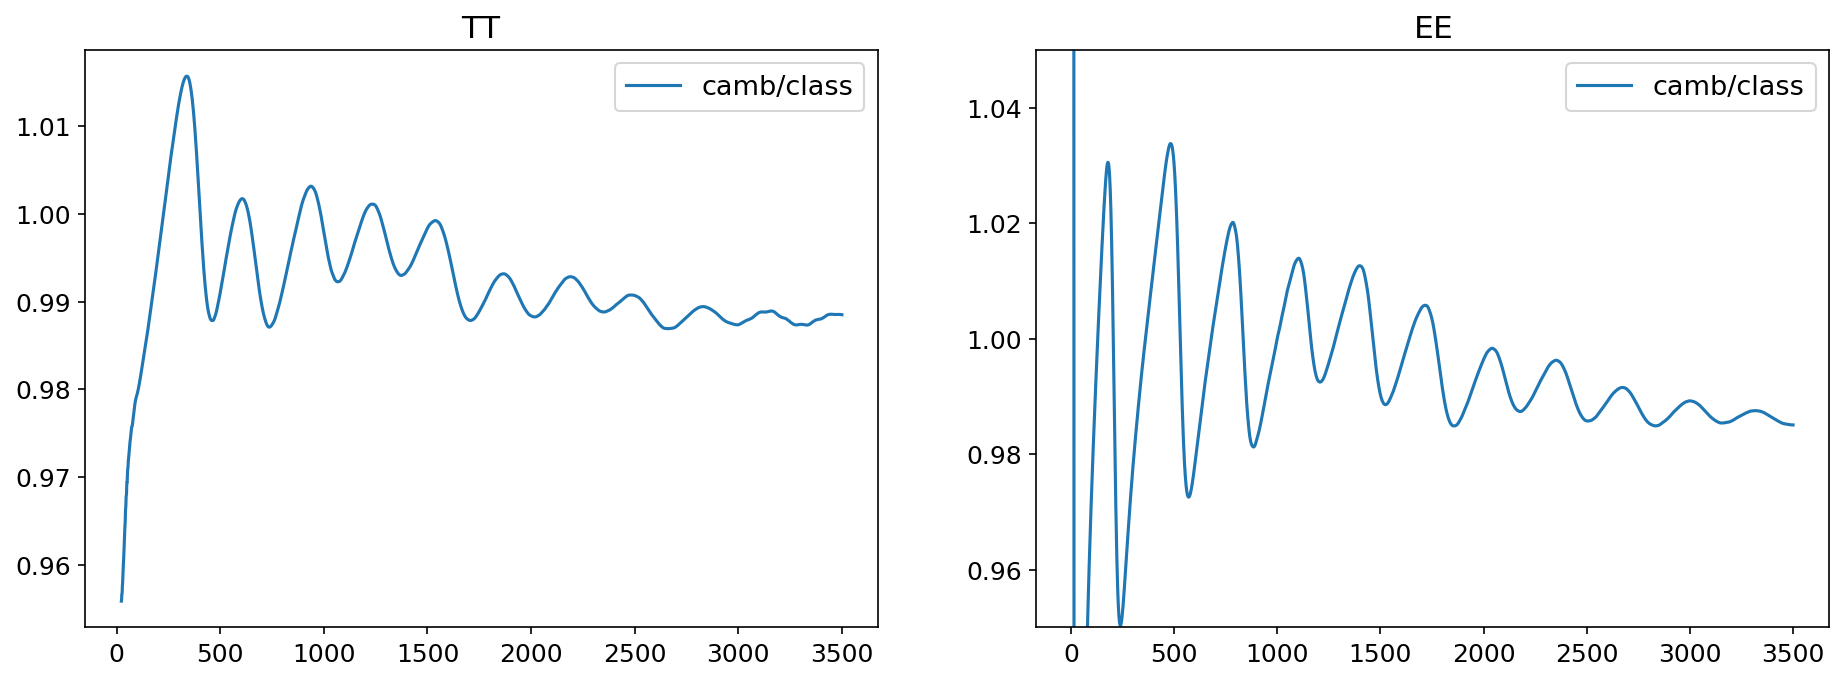

In [48]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
l = cl_cls[:3500,0]
l_ref = cl_ref[:,0]

ax[0].plot(l[20:], cl_cam[20:3500,0]/cl_cls[20:3500,1], label='camb/class')
ax[0].set_title(r"$TT$")
ax[0].legend()

ax[1].plot(l[5:], cl_cam[5:3500,1]/cl_cls[5:3500,2], label='camb/class')
ax[1].set_title(r"$EE$")
ax[1].set_ylim([0.95,1.05])
ax[1].legend()

In [24]:
ptnms_cam = None
pt_cam = None
tau = np.logspace(-2, np.log10(13000), num=1000)
ptnms_cam, vls = pars.EFTCAMB.get_evolution(results, 0.1, tau)
print(ptnms_cam)
pt_cam = np.empty([len(tau), len(ptnms_cam)])
for i in range(len(tau)):
    pt_cam[i,:] = np.array(list(vls[0][i]))

ptnms_cls = None
pt_cls = None
with open('/data2/code/hi_classy_dev/output/boxphi_perturbations_k0_s.dat', 'r') as f_in:
  dat = f_in.readlines()
  ptnms_cls = dat[1].replace('#', '').split()
  i = 0
  while i < len(ptnms_cls):
    if ':' not in ptnms_cls[i]:
      ptnms_cls.pop(i)
    else:
      ptnms_cls[i] = ptnms_cls[i].split(sep=':')[-1]
      i += 1 
  print(ptnms_cls)
pt_cls = np.loadtxt('/data2/code/hi_classy_dev/output/boxphi_perturbations_k0_s.dat')
tau = pt_cls[:,0]


['a', 'tau', 'k', 'grhoa2', 'grhom_t', 'gpresm_t', 'gpresdotm_t', 'gpresdotdotm_t', 'grhob_t', 'grhoc_t', 'grhor_t', 'grhog_t', 'grhov_t', 'gpiv_t', 'grhonu_tot', 'gpinu_tot', 'grhonudot_tot', 'gpinudot_tot', 'gpinudotdot_tot', 'adotoa', 'Hdot', 'Hdotdot', 'Hdotdotdot', 'EFTOmegaV', 'EFTOmegaP', 'EFTOmegaPP', 'EFTOmegaPPP', 'EFTOmegaPPPP', 'EFTc', 'EFTcdot', 'EFTcdotdot', 'EFTLambda', 'EFTLambdadot', 'EFTLambdadotdot', 'EFTGamma1V', 'EFTGamma1P', 'EFTGamma1PP', 'EFTGamma2V', 'EFTGamma2P', 'EFTGamma2PP', 'EFTGamma2PPP', 'EFTGamma3V', 'EFTGamma3P', 'EFTGamma3PP', 'EFTGamma3PPP', 'EFTGamma3PPPP', 'EFTGamma4V', 'EFTGamma4P', 'EFTGamma4PP', 'EFTGamma5V', 'EFTGamma5P', 'EFTGamma6V', 'EFTGamma6P', 'alphaB', 'alphaBdot', 'alphaT', 'alphaTdot', 'alphaK', 'alphaKdot', 'alphaM', 'alphaMdot', 'Meff2', 'spi1', 'spi2', 'spi3', 'spih', 'spie', 'spim', 's00', 's00k', 's00p', 's0i', 's0ip', 'sii', 'siik', 'siip', 'siipp', 'sij', 'sijdot', 'phi_scf', 'dphi', 'ddphi', 'dddphi', 'grhoq', 'gpresq', 'grhodo

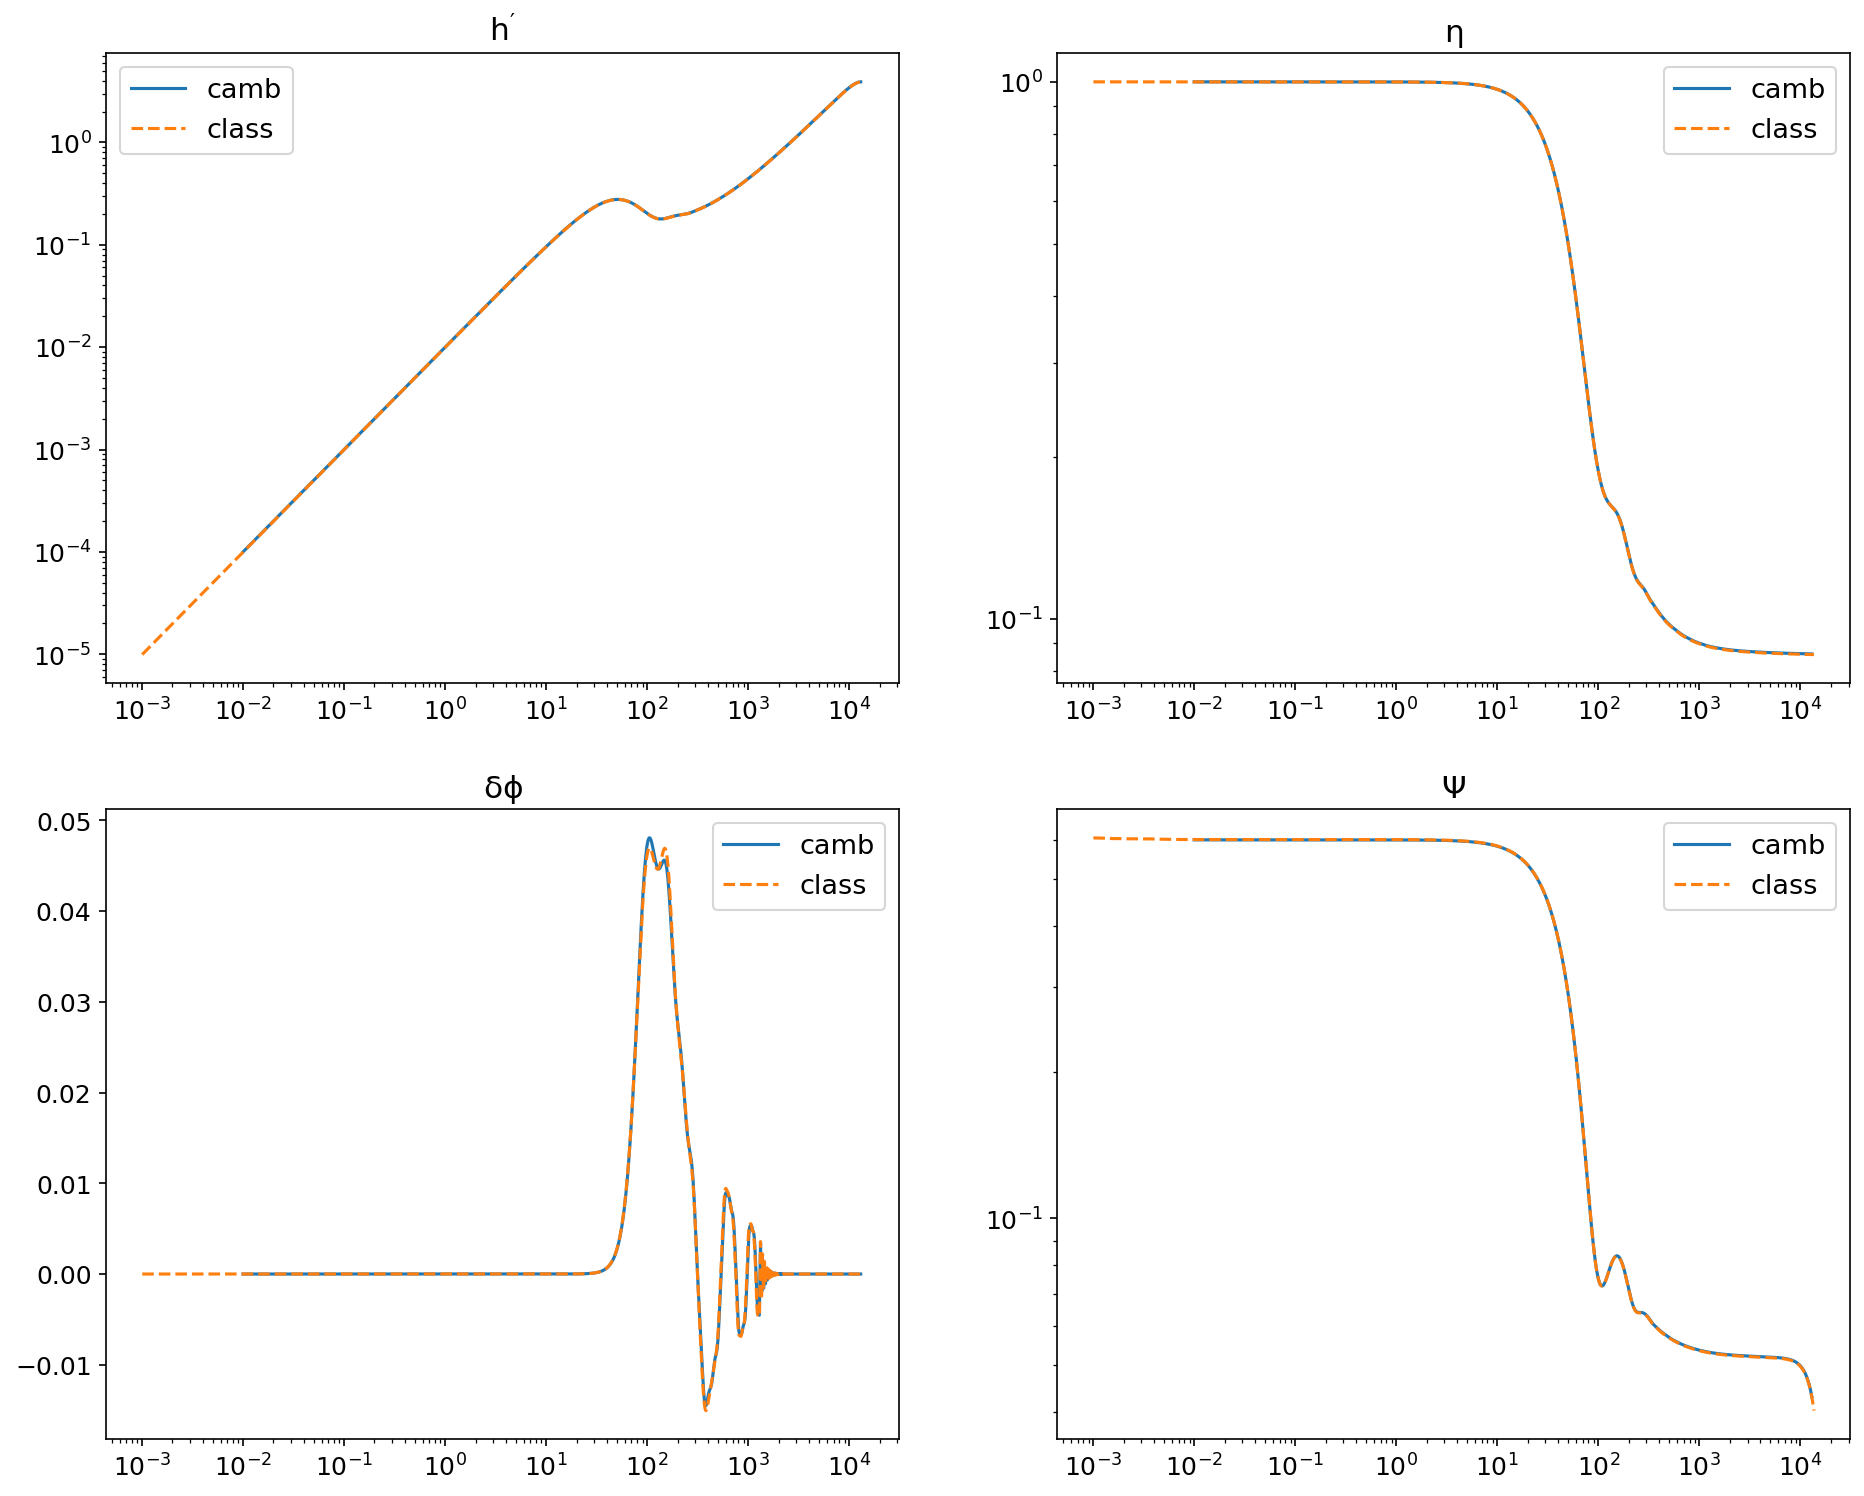

In [25]:
fig, ax = plt.subplots(2,2, figsize = (15,12))

ax[0,0].loglog(pt_cam[:,ptnms_cam.index('tau')], -0.2*pt_cam[:,ptnms_cam.index('z')], label='camb')
ax[0,0].loglog(pt_cls[:,ptnms_cls.index('tau')], pt_cls[:,ptnms_cls.index('h_prime')], label='class', ls='--')
ax[0,0].set_title(r'$h^\prime$')
ax[0,0].legend()

ax[0,1].loglog(pt_cam[:,ptnms_cam.index('tau')],- pt_cam[:,ptnms_cam.index('etak')]/0.1, label='camb')
ax[0,1].loglog(pt_cls[:,ptnms_cls.index('tau')], pt_cls[:,ptnms_cls.index('eta')], label='class', ls='--')
ax[0,1].set_title(r'$\eta$')
ax[0,1].legend()

ax[1,0].plot(pt_cam[:,ptnms_cam.index('tau')], -pt_cam[:,ptnms_cam.index('delta_phi')], label='camb')
ax[1,0].plot(pt_cls[:,ptnms_cls.index('tau')], pt_cls[:,ptnms_cls.index('delta_phi_smg')], label='class', ls='--')
ax[1,0].set_title(r'$\delta\phi$')
ax[1,0].set_xscale('log')
ax[1,0].legend()

ax[1,1].loglog(pt_cam[:,ptnms_cam.index('tau')], -pt_cam[:,ptnms_cam.index('Psi')], label='camb')
ax[1,1].loglog(pt_cls[:,ptnms_cls.index('tau')], pt_cls[:,ptnms_cls.index('psi')], label='class', ls='--')
ax[1,1].set_title(r'$\Psi$')
# ax[1,1].set_xscale('log')
ax[1,1].legend()
